In [9]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *


from matplotlib import rcParams
rcParams["font.size"] = 14
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

####################################### Set Axes
def set_axes(ax_list, xlim, ylim):
    for ax in ax_list:
        
        ax.set_ylim(ylim)
        ax.set_xlim(xlim) 
        ax.tick_params(which='major', length=6, width=1.5, direction='in')
        ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')  

        y_ax = ax.twinx()
        y_ax.set_ylim(ylim)
        y_ax.set_yticklabels([])
        y_ax.minorticks_on()
        y_ax.tick_params(which='major', length=6, width=1.5, direction='in')
        y_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')        

        x_ax = ax.twiny()
        x_ax.set_xlim(xlim)
        x_ax.set_xticklabels([])
        x_ax.minorticks_on()
        x_ax.tick_params(which='major', length=6, width=1.0, direction='in')
        x_ax.tick_params(which='minor', length=4, color='#000033', width=1.0, direction='in')     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(14) 
####################################### Plotting Function

In [25]:
inFile = 'corrected_mags_linewidth_all.csv'

table   = np.genfromtxt(inFile , delimiter='|', filling_values=-99999, names=True, dtype=None, encoding=None)

Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

u_s = table['u_s']
g_s = table['g_s']
r_s = table['r_s']
i_s = table['i_s']
z_s = table['z_s']
w1_s = table['w1_s']
w2_s = table['w2_s']

w1_ss = table['w1_ss']
w2_ss = table['w2_ss']

gamma_u = table['gamma_u']
gamma_g = table['gamma_g']
gamma_r = table['gamma_r']
gamma_i = table['gamma_i']
gamma_z = table['gamma_z']
gamma_w1 = table['gamma_w1']
gamma_w2 = table['gamma_w2']

gamma_p_u = table['gamma_p_u']
gamma_p_g = table['gamma_p_g']
gamma_p_r = table['gamma_p_r']
gamma_p_i = table['gamma_p_i']
gamma_p_z = table['gamma_p_z']
gamma_p_w1 = table['gamma_p_w1']
gamma_p_w2 = table['gamma_p_w2']

N = len(Sqlt)
q = np.zeros(N)

q[np.where(Sqlt>2)]+=1
q[np.where(Wqlt>2)]+=1
indx, = np.where(q==2)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


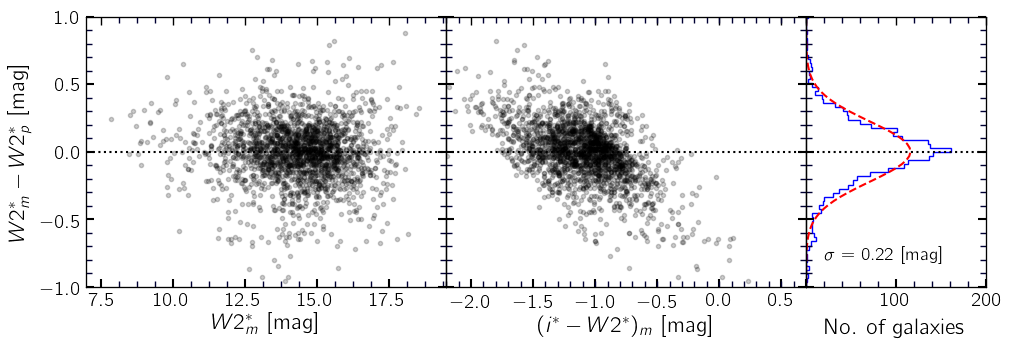

In [78]:
W2_lst  = w2_s[indx]
w2p_lst = w2_ss[indx]
i_w2    = i_s[indx]-w2_s[indx]


#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################

ax.plot(W2_lst, W2_lst-w2p_lst, '.', color='black', alpha=0.2)
ax.plot([-20,20],[0,0], 'k:')
set_axes([ax], [7.,19.5], [-1,1])
ax.set_xlabel(r'$W2^*_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$W2^*_m-W2^*_p$'+' [mag]', fontsize=16)

ax_.plot(i_w2, W2_lst-w2p_lst, '.', color='black', alpha=0.2)
ax_.plot([-20,20],[0,0], 'k:')
set_axes([ax_], [-2.2,0.7], [-1,1])
ax_.set_xlabel(r'$(i^*-W2^*)_m$'+' [mag]', fontsize=16)
plt.setp(ax_.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)


XX = W2_lst-w2p_lst
XX = XX[np.where(np.abs(XX)<1.)]
mu = 0 # np.median(XX)
sigma = np.std(XX)
#################################################################
# ax.text(8,-0.75, 'RMS = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
ax__.text(20,-0.8, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=13, color='k')
#################################################################
n, bins, patches = ax__.hist(W2_lst-w2p_lst, bins=100, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,200], [-1,1])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab
ax__.plot([0,1000],[0,0], 'k:')
y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

plt.subplots_adjust(hspace=.0, wspace=0)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


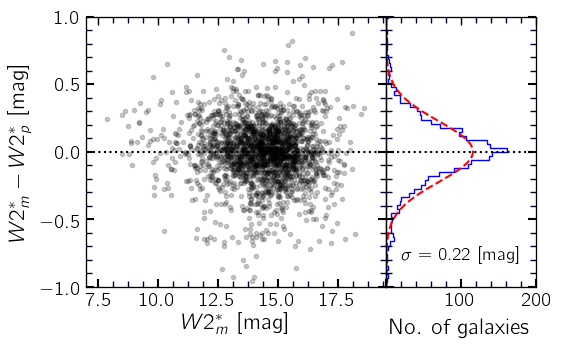

In [77]:
W2_lst  = w2_s[indx]
w2p_lst = w2_ss[indx]
i_w2    = i_s[indx]-w2_s[indx]


#################################################################
fig = py.figure(figsize=(6, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.5]) 

ax = plt.subplot(gs[0])
# ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[1])
#################################################################

ax.plot(W2_lst, W2_lst-w2p_lst, '.', color='black', alpha=0.2)
ax.plot([-20,20],[0,0], 'k:')
set_axes([ax], [7.,19.5], [-1,1])
ax.set_xlabel(r'$W2^*_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$W2^*_m-W2^*_p$'+' [mag]', fontsize=16)

# ax_.plot(i_w2, W2_lst-w2p_lst, '.', color='orange', alpha=0.2)
# ax_.plot([-20,20],[0,0], 'k:')
# set_axes([ax_], [-2.2,0.7], [-1,1])
# ax_.set_xlabel(r'$(i^*-W2^*)_m$'+' [mag]', fontsize=16)
# plt.setp(ax_.get_yticklabels(), visible=False)
# plt.subplots_adjust(hspace=.0, wspace=0)


XX = W2_lst-w2p_lst
XX = XX[np.where(np.abs(XX)<1.)]
mu = 0 # np.median(XX)
sigma = np.std(XX)
#################################################################
# ax.text(8,-0.75, 'RMS = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
ax__.text(20,-0.8, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=13, color='k')
#################################################################
n, bins, patches = ax__.hist(W2_lst-w2p_lst, bins=100, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,200], [-1,1])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab
ax__.plot([0,1000],[0,0], 'k:')
y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

plt.subplots_adjust(hspace=.0, wspace=0)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000'), Text(0,0,'1500')]

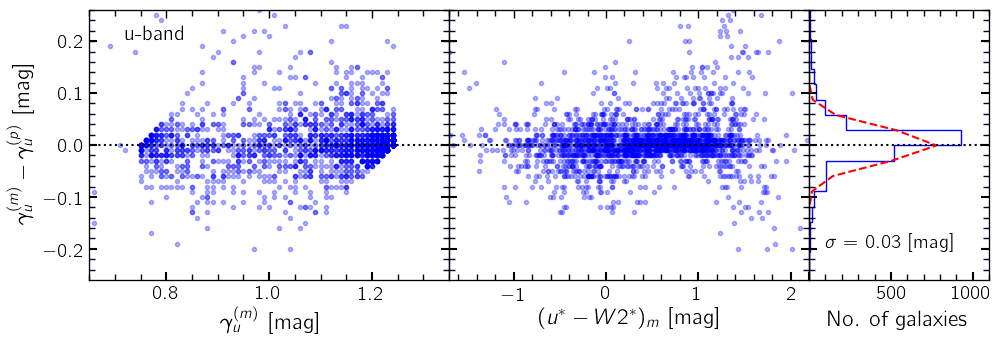

In [92]:
gamma_m = gamma_u[indx]
gamma_p = gamma_p_u[indx]
u_w2    = u_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='blue', alpha=0.3)
ax_.plot(u_w2, gamma_m-gamma_p, '.', color='blue', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.1)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(100,-0.2, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=50, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,1100], [-0.26,0.26])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_u^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(u^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_u^{(m)}-\gamma_u^{(p)}$'+' [mag]', fontsize=16)

ax.text(0.72,0.20, 'u-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,1100],[0,0], 'k:')
set_axes([ax], [0.65,1.35], [-0.26,0.26])
set_axes([ax_], [-1.7,2.2], [-0.26,0.26])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000')]

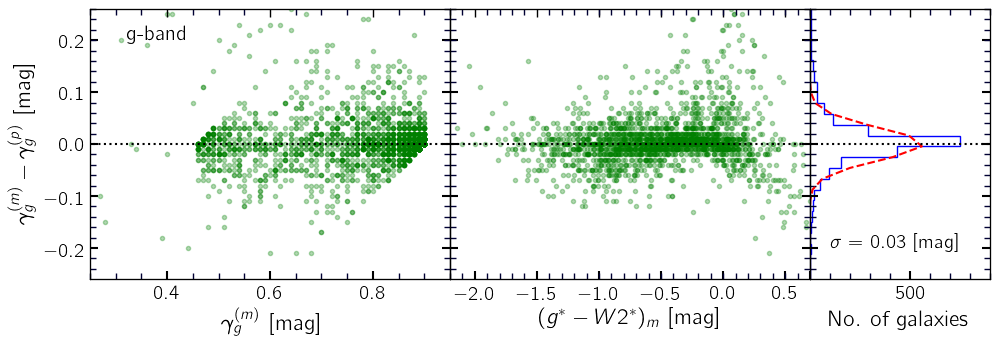

In [47]:
gamma_m = gamma_g[indx]
gamma_p = gamma_p_g[indx]
g_w2    = g_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='green', alpha=0.3)
ax_.plot(g_w2, gamma_m-gamma_p, '.', color='green', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.1)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(100,-0.2, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=50, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,900], [-0.26,0.26])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_g^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(g^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_g^{(m)}-\gamma_g^{(p)}$'+' [mag]', fontsize=16)

ax.text(0.32,0.20, 'g-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,1000],[0,0], 'k:')
set_axes([ax], [0.25,0.95], [-0.26,0.26])
set_axes([ax_], [-2.2,0.7], [-0.26,0.26])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000')]

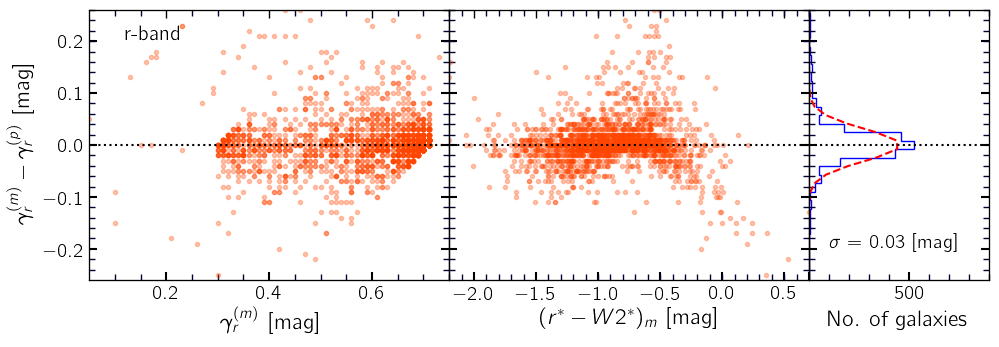

In [73]:
gamma_m = gamma_r[indx]
gamma_p = gamma_p_r[indx]
r_w2    = r_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='orangered', alpha=0.3)
ax_.plot(r_w2, gamma_m-gamma_p, '.', color='orangered', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.1)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(100,-0.2, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=50, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,900], [-0.26,0.26])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_r^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(r^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_r^{(m)}-\gamma_r^{(p)}$'+' [mag]', fontsize=16)

ax.text(0.12,0.20, 'r-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,1000],[0,0], 'k:')
set_axes([ax], [0.05,0.75], [-0.26,0.26])
set_axes([ax_], [-2.2,0.7], [-0.26,0.26])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000')]

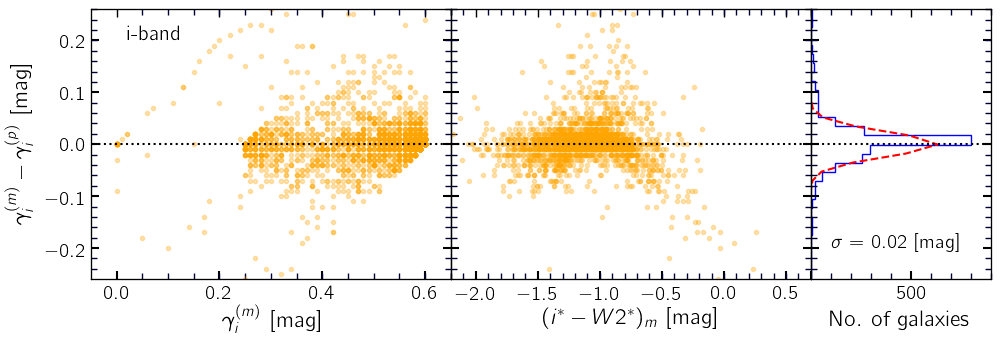

In [53]:
gamma_m = gamma_i[indx]
gamma_p = gamma_p_i[indx]
i_w2    = i_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='orange', alpha=0.3)
ax_.plot(i_w2, gamma_m-gamma_p, '.', color='orange', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.07)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(100,-0.2, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=50, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,900], [-0.26,0.26])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_i^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(i^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_i^{(m)}-\gamma_i^{(p)}$'+' [mag]', fontsize=16)

ax.text(0.02,0.20, 'i-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,1000],[0,0], 'k:')
set_axes([ax], [-0.05,0.65], [-0.26,0.26])
set_axes([ax_], [-2.2,0.7], [-0.26,0.26])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000')]

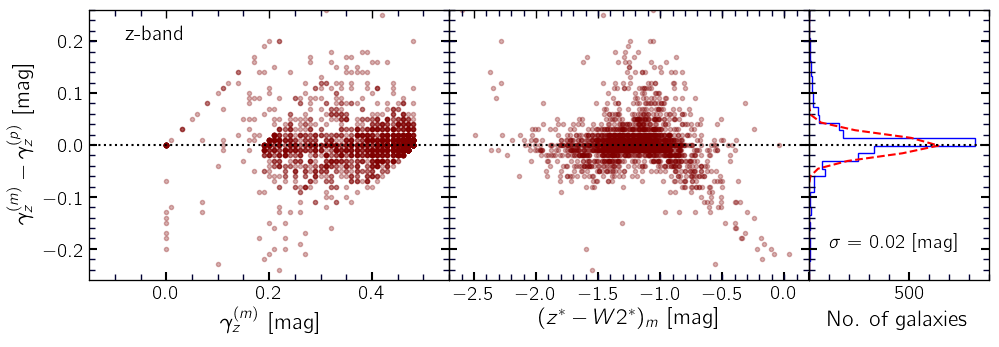

In [94]:
gamma_m = gamma_z[indx]
gamma_p = gamma_p_z[indx]
z_w2    = z_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='maroon', alpha=0.3)
ax_.plot(z_w2, gamma_m-gamma_p, '.', color='maroon', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.05)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(100,-0.2, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=50, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,900], [-0.26,0.26])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_z^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(z^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_z^{(m)}-\gamma_z^{(p)}$'+' [mag]', fontsize=16)

ax.text(-0.08,0.20, 'z-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,1000],[0,0], 'k:')
set_axes([ax], [-0.15,0.55], [-0.26,0.26])
set_axes([ax_], [-2.7,0.2], [-0.26,0.26])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


[Text(0,0,''), Text(0,0,'500'), Text(0,0,'1000'), Text(0,0,'1500')]

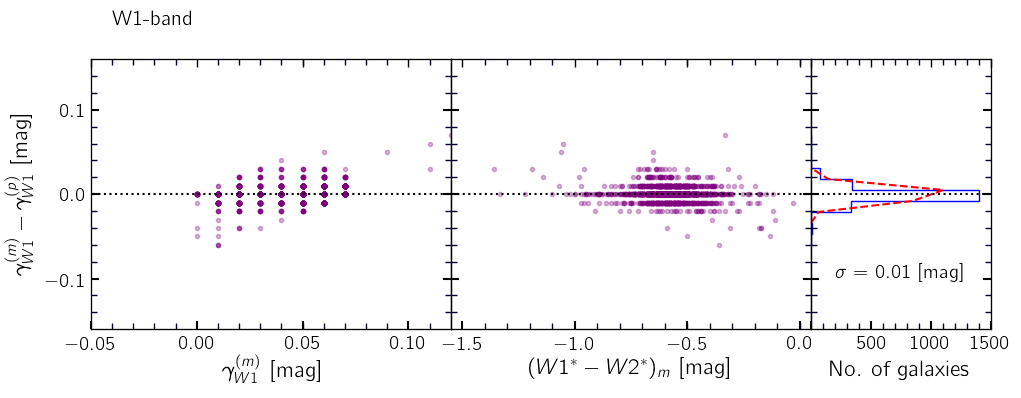

In [95]:
gamma_m = gamma_w1[indx]
gamma_p = gamma_p_w1[indx]
w1_w2    = w1_s[indx]-w2_s[indx]

#################################################################
fig = py.figure(figsize=(12, 3), dpi=100)  
fig.subplots_adjust(hspace=0, top=0.97, bottom=0.07, left=0.20, right=0.95)
gs = gridspec.GridSpec(1,3, width_ratios=[1,1,0.5]) 

ax = plt.subplot(gs[0])
ax_ = plt.subplot(gs[1])
ax__ = plt.subplot(gs[2])
#################################################################


ax.plot(gamma_m, gamma_m-gamma_p, '.', color='purple', alpha=0.3)
ax_.plot(w1_w2, gamma_m-gamma_p, '.', color='purple', alpha=0.3)

XX = gamma_m-gamma_p
XX = XX[np.where(np.abs(XX)<0.07)]
mu =  np.median(XX)
sigma = np.std(XX)
#################################################################
ax__.text(200,-0.1, r'$\sigma$'+' = '+'%.2f'%sigma+' [mag]', fontsize=14, color='k')
#################################################################

n, bins, patches = ax__.hist(gamma_m-gamma_p, bins=10, orientation="horizontal",histtype='step', color='b')
set_axes([ax__], [0,1500], [-0.16,0.16])
plt.setp(ax__.get_yticklabels(), visible=False)
ax__.set_xlabel('No. of galaxies', fontsize=16)
import matplotlib.mlab as mlab

y = mlab.normpdf(bins, mu, sigma)
d_bin = bins[1]-bins[0]
ax__.plot(1.0*(np.sum(n)*d_bin)*y, bins, 'r--')

ax.set_xlabel(r'$\gamma_{W1}^{(m)}$'+' [mag]', fontsize=16)
ax_.set_xlabel(r'$(W1^*-W2^*)_m$'+' [mag]', fontsize=16)
ax.set_ylabel(r'$\gamma_{W1}^{(m)}-\gamma_{W1}^{(p)}$'+' [mag]', fontsize=16)

ax.text(-0.04,0.20, 'W1-band', fontsize=15, color='k')
ax.plot([-1,10],[0,0], 'k:')
ax_.plot([-100,100],[0,0], 'k:')
ax__.plot([0,2000],[0,0], 'k:')
set_axes([ax], [-0.05,0.12], [-0.16,0.16])
set_axes([ax_], [-1.55,0.05], [-0.16,0.16])
plt.setp(ax_.get_yticklabels(), visible=False)
plt.setp(ax__.get_yticklabels(), visible=False)
plt.subplots_adjust(hspace=.0, wspace=0)

a=ax__.get_xticks().tolist()
a[0] = ''
for i in range(1,len(a)):
    a[i]="%d"%a[i]
ax__.set_xticklabels(a)